## Tamir Final Coursera Project - Hummus in LONDON


In [206]:
import numpy as np # library to handle data in a vectorized manner
import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import json
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


The purpose of this work is to simulate a business situation of choosing a location for a restaurant. In this case, the potential developer wants to find a place for a Hummus restaurant (Chickpeas). While asumming that a good location is around main tourist attractions because of the tourist traffic, I will extract a list of the most popular sites in LONDON and use the  Forcesquare site location data to find the ideal location for the restaurant according to the competitors locations and their concentrations. Competitors in this case will be a list of specific category of restaurants who usually compete with Hummus places like: middle-eastern, lebanese, israeli and such.

Let us assume for simplicity that it is worthwhile to open the restaurant near tourist sites in central London. We will harvest the list of popular tourist sites from this website:

In [207]:
import requests
import lxml
from bs4 import BeautifulSoup

# Obtaining data London Tourist website:
source = requests.get('https://www.londoncitybreak.com/areas').text
soup = BeautifulSoup(source, 'lxml')
soup.prettify

<bound method Tag.prettify of <!DOCTYPE html>
<html lang="en">
<head>
<link href="https://cdn.civitatis.com" rel="preconnect"/>
<title>Areas of London - Places and neighbourhoods in London</title>
<meta content="Areas of London - Places and neighbourhoods in London" name="title"/>
<meta content="London has 33 districts. Find out about Whitehall, Westminster, Piccadilly, St James’s, Soho, Trafalgar Square and other areas." name="description"/>
<meta content="soho, piccadilly, city, westminster, areas of london, london areas, london districts, districts of london, list of london districts, london neighborhoods, london neighbourhoods, best areas of london, popular london areas" name="keywords"/>
<meta content="telephone=no" name="format-detection"/>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<link href="mailto:" rel="author" rev="made"/>
<meta content="30" name="revisit-after"/>
<meta content="all" name="robots"/>
<meta content="width=device-width,initial-scale=1

In [208]:
#finding the best Atrractions according to the website:
PlaceName = []
td = soup.find_all('a', {"class":"o-page-nav__sub__element__link"})
for line in td[9:67]:
    place = line.get('title')
    PlaceName.append(place)

print(PlaceName)

['Westminster Palace', 'Westminster Abbey', 'Piccadilly Circus', 'Tower of London', 'Tower Bridge', "St Paul's Cathedral", 'London Eye', 'British Museum', 'Hyde Park', 'Camden Town', 'Ver todo', 'Monuments and Tourist attractions', 'Westminster Palace', 'Westminster Abbey', 'Piccadilly Circus', 'Tower of London', 'Tower Bridge', "St Paul's Cathedral", 'London Eye', 'Buckingham Palace', 'Big Ben', 'Kensington Palace', 'Trafalgar Square', 'Covent Garden', 'The Shard', 'Chinatown', 'The Old Operating Theatre', 'The Monument', 'Shakespeare’s Globe Theatre', 'Changing of the Guard', 'Apsley House', 'City Hall', 'HMS Belfast', 'Ver todo', 'Museums and Galleries', 'British Museum', 'National Gallery', 'Imperial War Museum', 'The Wallace Collection', 'Madame Tussauds London', 'The Natural History Museum', 'Science Museum', 'Victoria and Albert Museum', 'Tate Modern', 'Tate Britain', 'Museum of London', 'National Portrait Gallery', 'London Transport Museum', 'Sherlock Holmes Museum', 'Sir John 

In [209]:
# Form a dataframe:
dict = {'Place' : PlaceName}
        
info = pd.DataFrame.from_dict(dict)
info.head()

,Place
0,Westminster Palace
1,Westminster Abbey
2,Piccadilly Circus
3,Tower of London
4,Tower Bridge


In [210]:
#Cleaning the DataFrame from Website garbage:
to_drop = ['Ver todo', 'Monuments and Tourist attractions','Museums and Galleries']
info = info[~info['Place'].isin(to_drop)]


In [211]:
info

,Place
0,Westminster Palace
1,Westminster Abbey
2,Piccadilly Circus
3,Tower of London
4,Tower Bridge
5,St Paul's Cathedral
6,London Eye
7,British Museum
8,Hyde Park
9,Camden Town


In [212]:
# Extracting Loction Data for our Tourist Atracctions:
import geocoder

In [213]:
# Loop the gather the latitude and longitude:
for i, row in info.iterrows():
        # Accessing single Value:
        PlaceName = info.at[i, 'Place']
        
        #retreiving the Data:
        lat_lng = geocoder.arcgis('{}, London, UK'.format(PlaceName))
        lat_lng_coords = lat_lng.latlng
        latitude = lat_lng_coords[0]
        longitude = lat_lng_coords[1]
        
        #Pasting back to the df:
        info.at[i, 'Latitude'] = latitude
        info.at[i, 'Longitude'] = longitude
        
        #print for Fun!!


In [214]:
info

,Place,Latitude,Longitude
0,Westminster Palace,51.497258,-0.135522
1,Westminster Abbey,51.499980,-0.128330
2,Piccadilly Circus,51.509890,-0.134780
3,Tower of London,51.509740,-0.075230
4,Tower Bridge,51.505480,-0.075380
5,St Paul's Cathedral,51.513440,-0.099740
6,London Eye,51.503660,-0.119250
7,British Museum,51.518630,-0.125220
8,Hyde Park,51.508280,-0.161390
9,Camden Town,51.537620,-0.145090


In [378]:
#Checking DF size:
print('The dataframe has {} Places'.format(len(info['Place'].unique()))) 

The dataframe has 44 Places


In [429]:
#Finding london's coordinations:
address = 'London, UK'

geolocator = Nominatim(user_agent="London_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of London are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of London are 51.4893335, -0.144055084527687.


In [657]:
# create map of Toronto latitude and longitude values
map_London = folium.Map(width=1000,height=1000,location=[latitude, longitude], zoom_start=10)

In [658]:
type(map_London)

folium.folium.Map

In [659]:
# add markers to map
for lat, lng, Place in zip(info['Latitude'], info['Longitude'], info['Place']):
    label = '{}'.format(Place)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=True).add_to(map_London)  

map_London

In [122]:
#utilizing the Foursquare API to explore the Places and explore them:

In [123]:
#### Define Foursquare Credentials and Version ####

In [1]:
CLIENT_ID = 'Put your own' # your Foursquare ID
CLIENT_SECRET = 'Put your own' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: Put your own
CLIENT_SECRET:Put your own


In [125]:

##Get the neighborhood's latitude and longitude values.##
Place_latitude = info.loc[0, 'Latitude'] # neighborhood latitude value
Place_longitude =info.loc[0, 'Longitude'] # neighborhood longitude value

Place_name = info.loc[0, 'Place'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(Place_name, 
                                                               Place_latitude, 
                                                               Place_longitude))

Latitude and longitude values of Westminster Palace are 51.4972575, -0.13552199999999753.


In [126]:
# Now, let's get the top 100 venues that are in The Beachesl within a radius of 500 meters.#

In [316]:
radius = 750
LIMIT = 100
# type your answer here
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    Place_latitude, 
    Place_longitude, 
    radius, 
    LIMIT)
url # display URL



'https://api.foursquare.com/v2/venues/explore?&client_id=VR0NKR2RAWLLONO3HS0C1OFAAAYU3VRBAOP133DKS5PSZXCR&client_secret=DLSDW4MD0CVSU05QBAVIZ1CULPMUFDKVIMRWQBO2XP1JYXMY&v=20180605&ll=51.4972575,-0.13552199999999753&radius=750&limit=100'

In [317]:
#Send the GET request and examine the resutls

In [318]:
results = requests.get(url).json()

In [319]:
results

{'meta': {'code': 200, 'requestId': '5d825765acc5f500395dd02c'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Westminster',
  'headerFullLocation': 'Westminster, London',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 186,
  'suggestedBounds': {'ne': {'lat': 51.50400750675001,
    'lng': -0.12469976719639436},
   'sw': {'lat': 51.49050749325, 'lng': -0.1463442328036007}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4f64ea20e4b0c7552d443a6c',
       'name': 'Taj  51 Buckingham Gate Suites & Residences',
       'location': {'address': '51 Buckingham Gate',
        'lat': 51.49859750553769,
        'lng': -0.1374039555861322,
        'labeledLatLngs': [{'label

In [320]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [321]:
#Now we are ready to clean the json and structure it into a *pandas* dataframe.

In [322]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Taj 51 Buckingham Gate Suites & Residences,Hotel,51.498598,-0.137404
1,Curzon Victoria,Indie Movie Theater,51.497473,-0.136744
2,Iris & June,Coffee Shop,51.496791,-0.136011
3,St Ermin's Hotel,Hotel,51.499137,-0.134417
4,Run & Become,Sporting Goods Shop,51.498128,-0.135426


In [134]:
#And how many venues were returned by Foursquare?

In [323]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

100 venues were returned by Foursquare.


<a id='item2'></a>

In [324]:
# Let's create a function to repeat the same process to all the neighborhoods in London #

In [325]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Place', 
                  'Place Latitude', 
                  'Place Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [326]:
#Creating London Places:

In [327]:
London_venues = getNearbyVenues(names=info['Place'],
                                   latitudes=info['Latitude'],
                                   longitudes=info['Longitude']
                                  )

Westminster Palace
Westminster Abbey
Piccadilly Circus
Tower of London
Tower Bridge
St Paul's Cathedral
London Eye
British Museum
Hyde Park
Camden Town
Westminster Palace
Westminster Abbey
Piccadilly Circus
Tower of London
Tower Bridge
St Paul's Cathedral
London Eye
Buckingham Palace
Big Ben
Kensington Palace
Trafalgar Square
Covent Garden
The Shard
Chinatown
The Old Operating Theatre
The Monument
Shakespeare’s Globe Theatre
Changing of the Guard
Apsley House
City Hall
HMS Belfast
British Museum
National Gallery
Imperial War Museum
The Wallace Collection
Madame Tussauds London
The Natural History Museum
Science Museum
Victoria and Albert Museum
Tate Modern
Tate Britain
Museum of London
National Portrait Gallery
London Transport Museum
Sherlock Holmes Museum
Sir John Soane’s Museum
Ripley’s, Believe it or not!
Parks and Gardens
Hyde Park
St James’s Park
Kensington Gardens
Regent's Park
Green Park


In [140]:
#### Let's check the size of the resulting dataframe

In [465]:
print(London_venues.shape)
London_venues

(4109, 7)


,Place,Place Latitude,Place Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Westminster Palace,51.497258,-0.135522,Taj 51 Buckingham Gate Suites & Residences,51.498598,-0.137404,Hotel
1,Westminster Palace,51.497258,-0.135522,Curzon Victoria,51.497473,-0.136744,Indie Movie Theater
2,Westminster Palace,51.497258,-0.135522,Iris & June,51.496791,-0.136011,Coffee Shop
3,Westminster Palace,51.497258,-0.135522,Run & Become,51.498128,-0.135426,Sporting Goods Shop
4,Westminster Palace,51.497258,-0.135522,St Ermin's Hotel,51.499137,-0.134417,Hotel
5,Westminster Palace,51.497258,-0.135522,Chez Antoinette,51.497964,-0.135455,French Restaurant
6,Westminster Palace,51.497258,-0.135522,Flat Cap Coffee Co,51.497496,-0.133858,Coffee Shop
7,Westminster Palace,51.497258,-0.135522,Quilon,51.498772,-0.137522,Indian Restaurant
8,Westminster Palace,51.497258,-0.135522,Gymbox,51.496934,-0.137257,Gym
9,Westminster Palace,51.497258,-0.135522,Strutton Ground Market,51.496782,-0.133717,Street Food Gathering


In [371]:
# print(London_venues['Venue Category'].unique())
London_venues[London_venues['Venue Category'].str.contains("Fast")]


,Place,Place Latitude,Place Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
10,Westminster Palace,51.497258,-0.135522,Leon,51.497495,-0.136464,Fast Food Restaurant
50,Westminster Palace,51.497258,-0.135522,Leon,51.494894,-0.129718,Fast Food Restaurant
237,Tower of London,51.509740,-0.075230,Leon,51.511926,-0.079718,Fast Food Restaurant
741,Camden Town,51.537620,-0.145090,Real Taste,51.535787,-0.139637,Fast Food Restaurant
753,Westminster Palace,51.497258,-0.135522,Leon,51.497495,-0.136464,Fast Food Restaurant
793,Westminster Palace,51.497258,-0.135522,Leon,51.494894,-0.129718,Fast Food Restaurant
980,Tower of London,51.509740,-0.075230,Leon,51.511926,-0.079718,Fast Food Restaurant
1420,Kensington Palace,51.503730,-0.188170,Leon,51.500759,-0.192539,Fast Food Restaurant
1740,The Shard,51.504120,-0.086580,Leon,51.505214,-0.089590,Fast Food Restaurant
1855,The Old Operating Theatre,51.504930,-0.088590,Leon,51.505214,-0.089590,Fast Food Restaurant


In [142]:
#Selecting Only the potential Competitors - Middle Easters Cusine:

In [469]:
 London_Competitiors = London_venues[London_venues['Venue Category'].isin(['Turkish Restaurant','Mediterranean Restaurant',
                                                                            'Israeli Restaurant','Middle Eastern Restaurant',
                                                                            'Kebab Restaurant','Falafel Restaurant',
                                                                            'Halal Restaurant','Iraqi Restaurant', 
                                                                            'Lebanese Restaurant','Persian Restaurant',
                                                                            'Greek Restaurant',
                                                                            'Moroccan Restaurant','Fast Food Restaurant',
                                                                            'Vegetarian / Vegan Restaurant',' Sandwich Place',
                                                                            'Fast Food Restaurant'])]


In [470]:
London_Competitiors.reset_index(drop=True,inplace=True)

In [471]:
London_Competitiors.shape

(123, 7)

In [660]:
map_competition = map_London

In [661]:
map_competition

In [662]:
# add markers of Competitors on Map along side Places:
for lat, lng, Venue, Type in zip(London_Competitiors['Venue Latitude'], London_Competitiors['Venue Longitude'], London_Competitiors['Venue'], London_Competitiors['Venue Category']):
    label = '{}, {}'.format(Venue, Type)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='pink',
        fill=True,
        fill_color='#ff6666',
        fill_opacity=0.7,
        parse_html=True).add_to(map_competition)  
    
map_competition

In [336]:
# Let's add HeatMap to increase visibilty of competition:

In [458]:
from folium import FeatureGroup, LayerControl, Map, Marker
from folium.plugins import HeatMap

In [462]:
London_Heat = HeatMap( list(zip(London_Competitiors['Venue Latitude'],London_Competitiors['Venue Longitude'])),
                     min_opacity=0.7,
                     radius=25, blur=15,
                     max_zoom=30
                 )

In [457]:
map_heat = map_London

In [463]:
# London_Heat.add_to(map_competition)
London_Heat.add_to(map_heat)

In [464]:
map_heat

In [477]:
# Let's find out how many unique categories can be curated from all the returned venues
print('There are {} uniques categories.'.format(len(London_Competitiors['Venue Category'].unique())))

There are 14 uniques categories.


In [478]:
## Analyze Each Neighborhood

In [684]:
# one hot encoding
London_onehot = pd.get_dummies(London_Competitiors[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
London_onehot['Place'] = London_Competitiors['Place'] 

# move neighborhood column to the first column
fixed_columns = [London_onehot.columns[-1]] + list(London_onehot.columns[:-1])
London_onehot = London_onehot[fixed_columns]

London_onehot

,Place,Falafel Restaurant,Fast Food Restaurant,Greek Restaurant,Halal Restaurant,Iraqi Restaurant,Israeli Restaurant,Kebab Restaurant,Lebanese Restaurant,Mediterranean Restaurant,Middle Eastern Restaurant,Moroccan Restaurant,Persian Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant
0,Westminster Palace,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,Westminster Palace,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Westminster Palace,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,Piccadilly Circus,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,Piccadilly Circus,0,0,1,0,0,0,0,0,0,0,0,0,0,0
5,Piccadilly Circus,0,0,0,0,0,0,0,0,1,0,0,0,0,0
6,Piccadilly Circus,0,0,0,0,0,0,0,0,0,0,0,0,0,1
7,Tower of London,0,1,0,0,0,0,0,0,0,0,0,0,0,0
8,Tower of London,0,0,0,0,0,0,0,0,0,0,0,0,1,0
9,Tower Bridge,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [480]:
#And let's examine the new dataframe size.

In [481]:
# Sorting the Hardest Areas with the most competitors:

London_Totals = London_onehot.groupby(['Place']).sum()

In [482]:
London_Totals['Total'] = London_Totals.sum(axis=1)

In [683]:
London_Totals.sort_values(by='Total', ascending=False, inplace=True)
London_Totals

,Falafel Restaurant,Fast Food Restaurant,Greek Restaurant,Halal Restaurant,Iraqi Restaurant,Israeli Restaurant,Kebab Restaurant,Lebanese Restaurant,Mediterranean Restaurant,Middle Eastern Restaurant,Moroccan Restaurant,Persian Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Total
Place,,,,,,,,,,,,,,,
Camden Town,0,1,5,1,0,0,1,0,0,1,0,0,0,3,12
British Museum,0,0,2,0,0,0,0,0,4,0,0,0,2,0,8
Piccadilly Circus,0,0,2,0,0,2,0,0,2,0,0,0,0,2,8
Apsley House,0,0,0,0,1,0,0,1,0,2,0,1,1,0,6
St Paul's Cathedral,4,0,0,0,0,0,0,0,0,0,0,0,2,0,6
Westminster Palace,2,4,0,0,0,0,0,0,0,0,0,0,0,0,6
Sherlock Holmes Museum,0,0,1,1,0,0,0,0,1,1,0,0,1,0,5
Madame Tussauds London,0,0,1,1,0,0,0,0,1,1,0,0,1,0,5
The Wallace Collection,0,0,2,0,0,0,0,0,1,1,0,0,1,0,5


In [499]:
London_Totals.to_excel('table.xlsx')

In [564]:
totals = London_Totals[["Total"]]
totals.head()

,Total
Place,
Camden Town,12
Piccadilly Circus,8
British Museum,8
Apsley House,6
St Paul's Cathedral,6


In [565]:
# Visualizing Places according to competitors:

import matplotlib as mpl
import matplotlib.pyplot as plt

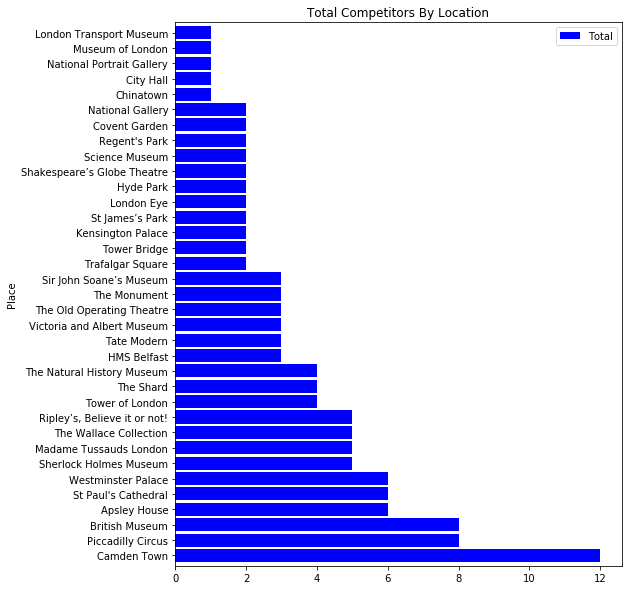

In [637]:
x = totals.plot(kind='barh',
                figsize=(8, 10),
                color= 'blue',
                 zorder=1,
                 width=0.85,
                 title='Total Competitors By Location', 
               )
plt.savefig("myplot.png", dpi = 400)

In [290]:
# Next, let's group rows by Places and by taking the mean of the frequency of occurrence of each category

In [638]:
London_grouped = '' 

In [639]:
London_grouped = London_onehot.groupby('Place').mean().reset_index()

In [640]:
London_grouped.head()

,Place,Falafel Restaurant,Fast Food Restaurant,Greek Restaurant,Halal Restaurant,Iraqi Restaurant,Israeli Restaurant,Kebab Restaurant,Lebanese Restaurant,Mediterranean Restaurant,Middle Eastern Restaurant,Moroccan Restaurant,Persian Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant
0,Apsley House,0.0,0.000000,0.000000,0.000000,0.166667,0.0,0.000000,0.166667,0.0,0.333333,0.0,0.166667,0.166667,0.00
1,British Museum,0.0,0.000000,0.250000,0.000000,0.000000,0.0,0.000000,0.000000,0.5,0.000000,0.0,0.000000,0.250000,0.00
2,Camden Town,0.0,0.083333,0.416667,0.083333,0.000000,0.0,0.083333,0.000000,0.0,0.083333,0.0,0.000000,0.000000,0.25
3,Chinatown,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,1.000000,0.00
4,City Hall,1.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.00


In [641]:
# Let's confirm the new size

In [642]:
London_grouped.shape

(35, 15)

In [643]:
# Let's print each Place along with the top 5 most common venues

In [644]:
num_top_venues = 5

for attraction in London_grouped['Place']:
    print("----"+attraction+"----")
    temp = London_grouped[London_grouped['Place'] == attraction].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Apsley House----
                       venue  freq
0  Middle Eastern Restaurant  0.33
1           Iraqi Restaurant  0.17
2        Lebanese Restaurant  0.17
3         Persian Restaurant  0.17
4         Turkish Restaurant  0.17


----British Museum----
                      venue  freq
0  Mediterranean Restaurant  0.50
1          Greek Restaurant  0.25
2        Turkish Restaurant  0.25
3        Falafel Restaurant  0.00
4      Fast Food Restaurant  0.00


----Camden Town----
                           venue  freq
0               Greek Restaurant  0.42
1  Vegetarian / Vegan Restaurant  0.25
2           Fast Food Restaurant  0.08
3               Halal Restaurant  0.08
4               Kebab Restaurant  0.08


----Chinatown----
                  venue  freq
0    Turkish Restaurant   1.0
1    Falafel Restaurant   0.0
2  Fast Food Restaurant   0.0
3      Greek Restaurant   0.0
4      Halal Restaurant   0.0


----City Hall----
                  venue  freq
0    Falafel Restaurant   1.0
1  F

In [297]:
# Putting the DATA into df:

In [645]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [646]:
#Now let's create the new dataframe and display the top 10 venues for each Place.

In [647]:
Places_venues_sorted=''

In [648]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Place']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
Places_venues_sorted = pd.DataFrame(columns=columns)
Places_venues_sorted['Place'] = London_grouped['Place']

for ind in np.arange(London_grouped.shape[0]):
    Places_venues_sorted.iloc[ind, 1:] = return_most_common_venues(London_grouped.iloc[ind, :], num_top_venues)

Places_venues_sorted

,Place,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Apsley House,Middle Eastern Restaurant,Turkish Restaurant,Persian Restaurant,Lebanese Restaurant,Iraqi Restaurant,Vegetarian / Vegan Restaurant,Moroccan Restaurant,Mediterranean Restaurant,Kebab Restaurant,Israeli Restaurant
1,British Museum,Mediterranean Restaurant,Turkish Restaurant,Greek Restaurant,Vegetarian / Vegan Restaurant,Persian Restaurant,Moroccan Restaurant,Middle Eastern Restaurant,Lebanese Restaurant,Kebab Restaurant,Israeli Restaurant
2,Camden Town,Greek Restaurant,Vegetarian / Vegan Restaurant,Middle Eastern Restaurant,Kebab Restaurant,Halal Restaurant,Fast Food Restaurant,Turkish Restaurant,Persian Restaurant,Moroccan Restaurant,Mediterranean Restaurant
3,Chinatown,Turkish Restaurant,Vegetarian / Vegan Restaurant,Persian Restaurant,Moroccan Restaurant,Middle Eastern Restaurant,Mediterranean Restaurant,Lebanese Restaurant,Kebab Restaurant,Israeli Restaurant,Iraqi Restaurant
4,City Hall,Falafel Restaurant,Vegetarian / Vegan Restaurant,Turkish Restaurant,Persian Restaurant,Moroccan Restaurant,Middle Eastern Restaurant,Mediterranean Restaurant,Lebanese Restaurant,Kebab Restaurant,Israeli Restaurant
5,Covent Garden,Mediterranean Restaurant,Vegetarian / Vegan Restaurant,Turkish Restaurant,Persian Restaurant,Moroccan Restaurant,Middle Eastern Restaurant,Lebanese Restaurant,Kebab Restaurant,Israeli Restaurant,Iraqi Restaurant
6,HMS Belfast,Vegetarian / Vegan Restaurant,Lebanese Restaurant,Fast Food Restaurant,Turkish Restaurant,Persian Restaurant,Moroccan Restaurant,Middle Eastern Restaurant,Mediterranean Restaurant,Kebab Restaurant,Israeli Restaurant
7,Hyde Park,Turkish Restaurant,Vegetarian / Vegan Restaurant,Persian Restaurant,Moroccan Restaurant,Middle Eastern Restaurant,Mediterranean Restaurant,Lebanese Restaurant,Kebab Restaurant,Israeli Restaurant,Iraqi Restaurant
8,Kensington Palace,Lebanese Restaurant,Fast Food Restaurant,Vegetarian / Vegan Restaurant,Turkish Restaurant,Persian Restaurant,Moroccan Restaurant,Middle Eastern Restaurant,Mediterranean Restaurant,Kebab Restaurant,Israeli Restaurant
9,London Eye,Turkish Restaurant,Vegetarian / Vegan Restaurant,Persian Restaurant,Moroccan Restaurant,Middle Eastern Restaurant,Mediterranean Restaurant,Lebanese Restaurant,Kebab Restaurant,Israeli Restaurant,Iraqi Restaurant


In [357]:
 ## Cluster Places:

In [358]:
# Run *k*-means to cluster the Places into 5 clusters:

In [649]:
# set number of clusters
kclusters = 5

London_grouped_clustering = London_grouped.drop('Place', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(London_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 


array([0, 0, 0, 4, 2, 0, 1, 4, 1, 4])

In [650]:
# add clustering labels
Places_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

London_merged = info

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
London_merged = London_merged.join(Places_venues_sorted.set_index('Place'), on='Place')

London_merged.head() # check the last columns!

,Place,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Westminster Palace,51.497258,-0.135522,1.0,Fast Food Restaurant,Falafel Restaurant,Vegetarian / Vegan Restaurant,Turkish Restaurant,Persian Restaurant,Moroccan Restaurant,Middle Eastern Restaurant,Mediterranean Restaurant,Lebanese Restaurant,Kebab Restaurant
1,Westminster Abbey,51.499980,-0.128330,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Piccadilly Circus,51.509890,-0.134780,0.0,Vegetarian / Vegan Restaurant,Mediterranean Restaurant,Israeli Restaurant,Greek Restaurant,Turkish Restaurant,Persian Restaurant,Moroccan Restaurant,Middle Eastern Restaurant,Lebanese Restaurant,Kebab Restaurant
3,Tower of London,51.509740,-0.075230,1.0,Turkish Restaurant,Fast Food Restaurant,Vegetarian / Vegan Restaurant,Persian Restaurant,Moroccan Restaurant,Middle Eastern Restaurant,Mediterranean Restaurant,Lebanese Restaurant,Kebab Restaurant,Israeli Restaurant
4,Tower Bridge,51.505480,-0.075380,1.0,Vegetarian / Vegan Restaurant,Turkish Restaurant,Persian Restaurant,Moroccan Restaurant,Middle Eastern Restaurant,Mediterranean Restaurant,Lebanese Restaurant,Kebab Restaurant,Israeli Restaurant,Iraqi Restaurant


In [651]:
London = London_merged.dropna(inplace=True)

In [ ]:
#Finally, let's visualize the resulting clusters: 
#We avoid the "NaN" values in DF:

In [653]:
London_merged

,Place,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Westminster Palace,51.497258,-0.135522,1.0,Fast Food Restaurant,Falafel Restaurant,Vegetarian / Vegan Restaurant,Turkish Restaurant,Persian Restaurant,Moroccan Restaurant,Middle Eastern Restaurant,Mediterranean Restaurant,Lebanese Restaurant,Kebab Restaurant
2,Piccadilly Circus,51.509890,-0.134780,0.0,Vegetarian / Vegan Restaurant,Mediterranean Restaurant,Israeli Restaurant,Greek Restaurant,Turkish Restaurant,Persian Restaurant,Moroccan Restaurant,Middle Eastern Restaurant,Lebanese Restaurant,Kebab Restaurant
3,Tower of London,51.509740,-0.075230,1.0,Turkish Restaurant,Fast Food Restaurant,Vegetarian / Vegan Restaurant,Persian Restaurant,Moroccan Restaurant,Middle Eastern Restaurant,Mediterranean Restaurant,Lebanese Restaurant,Kebab Restaurant,Israeli Restaurant
4,Tower Bridge,51.505480,-0.075380,1.0,Vegetarian / Vegan Restaurant,Turkish Restaurant,Persian Restaurant,Moroccan Restaurant,Middle Eastern Restaurant,Mediterranean Restaurant,Lebanese Restaurant,Kebab Restaurant,Israeli Restaurant,Iraqi Restaurant
5,St Paul's Cathedral,51.513440,-0.099740,2.0,Falafel Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Persian Restaurant,Moroccan Restaurant,Middle Eastern Restaurant,Mediterranean Restaurant,Lebanese Restaurant,Kebab Restaurant,Israeli Restaurant
6,London Eye,51.503660,-0.119250,4.0,Turkish Restaurant,Vegetarian / Vegan Restaurant,Persian Restaurant,Moroccan Restaurant,Middle Eastern Restaurant,Mediterranean Restaurant,Lebanese Restaurant,Kebab Restaurant,Israeli Restaurant,Iraqi Restaurant
7,British Museum,51.518630,-0.125220,0.0,Mediterranean Restaurant,Turkish Restaurant,Greek Restaurant,Vegetarian / Vegan Restaurant,Persian Restaurant,Moroccan Restaurant,Middle Eastern Restaurant,Lebanese Restaurant,Kebab Restaurant,Israeli Restaurant
8,Hyde Park,51.508280,-0.161390,4.0,Turkish Restaurant,Vegetarian / Vegan Restaurant,Persian Restaurant,Moroccan Restaurant,Middle Eastern Restaurant,Mediterranean Restaurant,Lebanese Restaurant,Kebab Restaurant,Israeli Restaurant,Iraqi Restaurant
9,Camden Town,51.537620,-0.145090,0.0,Greek Restaurant,Vegetarian / Vegan Restaurant,Middle Eastern Restaurant,Kebab Restaurant,Halal Restaurant,Fast Food Restaurant,Turkish Restaurant,Persian Restaurant,Moroccan Restaurant,Mediterranean Restaurant
12,Westminster Palace,51.497258,-0.135522,1.0,Fast Food Restaurant,Falafel Restaurant,Vegetarian / Vegan Restaurant,Turkish Restaurant,Persian Restaurant,Moroccan Restaurant,Middle Eastern Restaurant,Mediterranean Restaurant,Lebanese Restaurant,Kebab Restaurant


In [664]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(London_merged['Latitude'], London_merged['Longitude'], London_merged['Place'], London_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    if cluster != 'nan':
#         if cluster != 0:
        try:
            cluster = int(cluster)
            folium.CircleMarker(
            [lat, lon],
            radius=8,
            popup=label,
            color=rainbow[cluster-1],
            fill=True,
            fill_color=rainbow[cluster-1],
            fill_opacity=0.7).add_to(map_competition)
        except:
            continue
map_competition



In [673]:
combine = pd.merge(London_Totals, London_merged, on="Place")

In [678]:
combine

,Place,Falafel Restaurant,Fast Food Restaurant,Greek Restaurant,Halal Restaurant,Iraqi Restaurant,Israeli Restaurant,Kebab Restaurant,Lebanese Restaurant,Mediterranean Restaurant,Middle Eastern Restaurant,Moroccan Restaurant,Persian Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Total,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Camden Town,0,1,5,1,0,0,1,0,0,1,0,0,0,3,12,51.537620,-0.145090,0.0,Greek Restaurant,Vegetarian / Vegan Restaurant,Middle Eastern Restaurant,Kebab Restaurant,Halal Restaurant,Fast Food Restaurant,Turkish Restaurant,Persian Restaurant,Moroccan Restaurant,Mediterranean Restaurant
1,Piccadilly Circus,0,0,2,0,0,2,0,0,2,0,0,0,0,2,8,51.509890,-0.134780,0.0,Vegetarian / Vegan Restaurant,Mediterranean Restaurant,Israeli Restaurant,Greek Restaurant,Turkish Restaurant,Persian Restaurant,Moroccan Restaurant,Middle Eastern Restaurant,Lebanese Restaurant,Kebab Restaurant
2,Piccadilly Circus,0,0,2,0,0,2,0,0,2,0,0,0,0,2,8,51.509890,-0.134780,0.0,Vegetarian / Vegan Restaurant,Mediterranean Restaurant,Israeli Restaurant,Greek Restaurant,Turkish Restaurant,Persian Restaurant,Moroccan Restaurant,Middle Eastern Restaurant,Lebanese Restaurant,Kebab Restaurant
3,British Museum,0,0,2,0,0,0,0,0,4,0,0,0,2,0,8,51.518630,-0.125220,0.0,Mediterranean Restaurant,Turkish Restaurant,Greek Restaurant,Vegetarian / Vegan Restaurant,Persian Restaurant,Moroccan Restaurant,Middle Eastern Restaurant,Lebanese Restaurant,Kebab Restaurant,Israeli Restaurant
4,British Museum,0,0,2,0,0,0,0,0,4,0,0,0,2,0,8,51.518630,-0.125220,0.0,Mediterranean Restaurant,Turkish Restaurant,Greek Restaurant,Vegetarian / Vegan Restaurant,Persian Restaurant,Moroccan Restaurant,Middle Eastern Restaurant,Lebanese Restaurant,Kebab Restaurant,Israeli Restaurant
5,Apsley House,0,0,0,0,1,0,0,1,0,2,0,1,1,0,6,51.503190,-0.151620,0.0,Middle Eastern Restaurant,Turkish Restaurant,Persian Restaurant,Lebanese Restaurant,Iraqi Restaurant,Vegetarian / Vegan Restaurant,Moroccan Restaurant,Mediterranean Restaurant,Kebab Restaurant,Israeli Restaurant
6,St Paul's Cathedral,4,0,0,0,0,0,0,0,0,0,0,0,2,0,6,51.513440,-0.099740,2.0,Falafel Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Persian Restaurant,Moroccan Restaurant,Middle Eastern Restaurant,Mediterranean Restaurant,Lebanese Restaurant,Kebab Restaurant,Israeli Restaurant
7,St Paul's Cathedral,4,0,0,0,0,0,0,0,0,0,0,0,2,0,6,51.513440,-0.099740,2.0,Falafel Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Persian Restaurant,Moroccan Restaurant,Middle Eastern Restaurant,Mediterranean Restaurant,Lebanese Restaurant,Kebab Restaurant,Israeli Restaurant
8,Westminster Palace,2,4,0,0,0,0,0,0,0,0,0,0,0,0,6,51.497258,-0.135522,1.0,Fast Food Restaurant,Falafel Restaurant,Vegetarian / Vegan Restaurant,Turkish Restaurant,Persian Restaurant,Moroccan Restaurant,Middle Eastern Restaurant,Mediterranean Restaurant,Lebanese Restaurant,Kebab Restaurant
9,Westminster Palace,2,4,0,0,0,0,0,0,0,0,0,0,0,0,6,51.497258,-0.135522,1.0,Fast Food Restaurant,Falafel Restaurant,Vegetarian / Vegan Restaurant,Turkish Restaurant,Persian Restaurant,Moroccan Restaurant,Middle Eastern Restaurant,Mediterranean Restaurant,Lebanese Restaurant,Kebab Restaurant


In [681]:
combine.drop_duplicates(subset='Place',inplace=True)

In [682]:
# Let's analize the meaning of the Clustering: !!!!![See summery in Presantation]!!!!
combine.sort_values(by=['Cluster Labels','Total'],ascending=False)

,Place,Falafel Restaurant,Fast Food Restaurant,Greek Restaurant,Halal Restaurant,Iraqi Restaurant,Israeli Restaurant,Kebab Restaurant,Lebanese Restaurant,Mediterranean Restaurant,Middle Eastern Restaurant,Moroccan Restaurant,Persian Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Total,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
29,London Eye,0,0,0,0,0,0,0,0,0,0,0,0,2,0,2,51.503660,-0.119250,4.0,Turkish Restaurant,Vegetarian / Vegan Restaurant,Persian Restaurant,Moroccan Restaurant,Middle Eastern Restaurant,Mediterranean Restaurant,Lebanese Restaurant,Kebab Restaurant,Israeli Restaurant,Iraqi Restaurant
31,Hyde Park,0,0,0,0,0,0,0,0,0,0,0,0,2,0,2,51.508280,-0.161390,4.0,Turkish Restaurant,Vegetarian / Vegan Restaurant,Persian Restaurant,Moroccan Restaurant,Middle Eastern Restaurant,Mediterranean Restaurant,Lebanese Restaurant,Kebab Restaurant,Israeli Restaurant,Iraqi Restaurant
38,Chinatown,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,51.497950,-0.025180,4.0,Turkish Restaurant,Vegetarian / Vegan Restaurant,Persian Restaurant,Moroccan Restaurant,Middle Eastern Restaurant,Mediterranean Restaurant,Lebanese Restaurant,Kebab Restaurant,Israeli Restaurant,Iraqi Restaurant
24,Trafalgar Square,0,0,1,0,0,0,1,0,0,0,0,0,0,0,2,51.507700,-0.127350,3.0,Kebab Restaurant,Greek Restaurant,Vegetarian / Vegan Restaurant,Turkish Restaurant,Persian Restaurant,Moroccan Restaurant,Middle Eastern Restaurant,Mediterranean Restaurant,Lebanese Restaurant,Israeli Restaurant
37,National Gallery,0,0,1,0,0,0,1,0,0,0,0,0,0,0,2,51.508530,-0.127940,3.0,Kebab Restaurant,Greek Restaurant,Vegetarian / Vegan Restaurant,Turkish Restaurant,Persian Restaurant,Moroccan Restaurant,Middle Eastern Restaurant,Mediterranean Restaurant,Lebanese Restaurant,Israeli Restaurant
40,National Portrait Gallery,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,51.509410,-0.127440,3.0,Kebab Restaurant,Vegetarian / Vegan Restaurant,Turkish Restaurant,Persian Restaurant,Moroccan Restaurant,Middle Eastern Restaurant,Mediterranean Restaurant,Lebanese Restaurant,Israeli Restaurant,Iraqi Restaurant
6,St Paul's Cathedral,4,0,0,0,0,0,0,0,0,0,0,0,2,0,6,51.513440,-0.099740,2.0,Falafel Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Persian Restaurant,Moroccan Restaurant,Middle Eastern Restaurant,Mediterranean Restaurant,Lebanese Restaurant,Kebab Restaurant,Israeli Restaurant
39,City Hall,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,51.515640,-0.092170,2.0,Falafel Restaurant,Vegetarian / Vegan Restaurant,Turkish Restaurant,Persian Restaurant,Moroccan Restaurant,Middle Eastern Restaurant,Mediterranean Restaurant,Lebanese Restaurant,Kebab Restaurant,Israeli Restaurant
41,Museum of London,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,51.517560,-0.096210,2.0,Falafel Restaurant,Vegetarian / Vegan Restaurant,Turkish Restaurant,Persian Restaurant,Moroccan Restaurant,Middle Eastern Restaurant,Mediterranean Restaurant,Lebanese Restaurant,Kebab Restaurant,Israeli Restaurant
8,Westminster Palace,2,4,0,0,0,0,0,0,0,0,0,0,0,0,6,51.497258,-0.135522,1.0,Fast Food Restaurant,Falafel Restaurant,Vegetarian / Vegan Restaurant,Turkish Restaurant,Persian Restaurant,Moroccan Restaurant,Middle Eastern Restaurant,Mediterranean Restaurant,Lebanese Restaurant,Kebab Restaurant
